In [335]:
import pandas
import numpy
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [439]:
def calculate_mean_std(array, axis):
    return numpy.mean(array, axis = axis), numpy.std(array, axis = 1)

In [300]:
train_data = pandas.read_csv("train.csv")
test_data = pandas.read_csv("test.csv")
train_data = numpy.array(train_data)
test_data = numpy.array(test_data)
x_train = train_data[:,2:]
y_train = train_data[:,1]
x_test = test_data[:,2:]
y_test = test_data[:,1]

In [14]:
print(x_train)

[[ 3  6  2 ...  1  1  1]
 [ 1 15  1 ...  2  1  1]
 [ 1 42  2 ...  1  2  1]
 ...
 [ 3 18  3 ...  1  1  1]
 [ 2 24  2 ...  1  1  1]
 [ 3 42  3 ...  1  2  1]]


In [147]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
pred = decision_tree_classifier.predict(x_test)
print(accuracy_score(pred, y_test))
print(decision_tree_classifier.score(x_train, y_train))
pred2 = random_forest_classifier.predict(x_test)
print(accuracy_score(pred2, y_test))
print(random_forest_classifier.score(x_train, y_train))


0.686
1.0
0.686
0.99


In [489]:
parameter_grid = {'criterion': ["gini", "entropy"], 'max_depth' : list(numpy.arange(1, 10, 1)), 'min_samples_split' : numpy.arange(10, 30, 5), 'min_samples_leaf' : [1,3,7,10]}
decision_tree_classifier = GridSearchCV(DecisionTreeClassifier(), param_grid = parameter_grid, cv = 3)
decision_tree_classifier.fit(x_train, y_train)
print(decision_tree_classifier.score(x_train, y_train))
print(decision_tree_classifier.score(x_test, y_test))

0.782
0.682


In [446]:
print(decision_tree_classifier.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 20}


In [449]:
pickle_out = open("Decision_Tree_Classifier.pickle","wb")
pickle.dump(decision_tree_classifier, pickle_out)
pickle_out.close()

In [334]:
parameter_grid_rf = {'criterion': ["gini", "entropy"], 'max_depth' : list(numpy.arange(3, 30, 5)), 'min_samples_split' : numpy.arange(50, 150, 20), 'min_samples_leaf' : numpy.arange(20, 100, 20), 'n_estimators' : numpy.arange(10, 100, 20)}
random_forest_classifier = GridSearchCV(RandomForestClassifier(), param_grid = parameter_grid_rf, cv = 3)
random_forest_classifier.fit(x_train, y_train)
pred_train = random_forest_classifier.predict(x_train)
pred = random_forest_classifier.predict(x_test)
print(accuracy_score(pred_train, y_train))
print(accuracy_score(pred, y_test))

0.754
0.702


In [443]:
results = pandas.DataFrame(decision_tree_classifier.cv_results_)
results.to_csv("Decision_tree_results.csv")
results = pandas.DataFrame(random_forest_classifier.cv_results_)
results.to_csv("Random_forest_results.csv")

In [336]:
print(random_forest_classifier.best_params_)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 30}


In [451]:
pickle_out = open("Random_Forest_Classifier.pickle","wb")
pickle.dump(random_forest_classifier, pickle_out)
pickle_out.close()

In [441]:
best_params_rf = random_forest_classifier.best_params_
rf_classifier = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], criterion=best_params_rf['criterion'], max_depth=best_params_rf['max_depth'], min_samples_split=best_params_rf['min_samples_split'], min_samples_leaf=best_params_rf['min_samples_leaf'])
rf_classifier.fit(x_train, y_train)
rf_classifier.score(x_train, y_train)

0.746

[[0.66666667 0.72727273 0.72727273]
 [0.67592593 0.73148148 0.73148148]
 [0.7431694  0.73770492 0.71584699]
 [0.7248062  0.70542636 0.69767442]
 [0.72672673 0.73573574 0.73273273]]


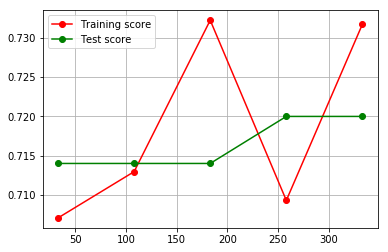

In [425]:
plt.grid()
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, x_train, y_train, cv = 3, train_sizes = numpy.linspace(.1, 1.0, 5))
print(train_scores)
train_scores_mean, train_score_std = calculate_mean_std(train_scores, 1)
test_scores_mean, test_scores_std = calculate_mean_std(test_scores, 1)
plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", la1bel="Test score")
plt.legend(loc="best")
plt.show()
#Source for plotting learning curves: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [355]:
best_params_dt = decision_tree_classifier.best_params_
dt_classifier = DecisionTreeClassifier(criterion=best_params_dt['criterion'], max_depth=best_params_dt['max_depth'], min_samples_split=best_params_dt['min_samples_split'], min_samples_leaf=best_params_dt['min_samples_leaf'])
dt_classifier.fit(x_train, y_train)
dt_classifier.score(x_train, y_train)

0.782

In [491]:
results_dt = decision_tree_classifier.cv_results_
test_score_dt = results_dt['mean_test_score']
ind = numpy.argmax(test_score_dt)
print(ind)
errors_dt = []
for i in range(3):
    errors_dt.append(1-results['split'+str(i)+'_test_score'][ind])
print(errors_dt)
print(numpy.var(errors_dt))

201
[0.23952095808383234, 0.281437125748503, 0.27108433734939763]
0.00031782136111014995


In [490]:
results_rf = random_forest_classifier.cv_results_
test_score = results_rf['mean_test_score']
ind = numpy.argmax(test_score)
print(ind)
errors = []
for i in range(3):
    errors.append(1-results['split'+str(i)+'_test_score'][ind])
print(errors)
print(numpy.var(errors))

58
[0.28742514970059885, 0.28742514970059885, 0.2831325301204819]
4.094796191022986e-06


In [488]:
decision_tree_classifier.cv_results_

{'mean_fit_time': array([1.59959793e-03, 0.00000000e+00, 8.00275803e-04, 7.99798965e-04,
        1.60512924e-03, 0.00000000e+00, 0.00000000e+00, 1.03068352e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.12452316e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.78575516e-04, 5.99575043e-04, 6.11495972e-04,
        6.03199005e-04, 3.99684906e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.21590424e-05, 7.99894333e-04, 8.20684433e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.12867165e-03, 0.00000000e+00, 0.00000000e+00, 3.12466621e-03,
        0.00000000e+00, 3.12809944e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.12113762e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.16891670e-03, 8.00323486e-04,
        0.00000000e+00, 1.59959793e-03, 7.96651840e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.38668

In [452]:
pickle_out = open("classifier_dt.pickle","wb")
pickle.dump(dt_classifier, pickle_out)
pickle_out.close()
pickle_out = open("classifier_rf.pickle","wb")
pickle.dump(rf_classifier, pickle_out)
pickle_out.close()

In [442]:
print(best_params_rf)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 30}


[[0.66666667 0.81818182 0.81818182]
 [0.77777778 0.83333333 0.83333333]
 [0.83060109 0.79781421 0.79234973]
 [0.79457364 0.78682171 0.76744186]
 [0.7957958  0.81381381 0.81981982]]


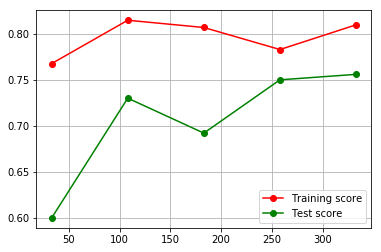

In [437]:
plt.grid()
train_sizes, train_scores, test_scores = learning_curve(dt_classifier, x_train, y_train, cv = 3, train_sizes = numpy.linspace(.1, 1.0, 5))
print(train_scores)
train_scores_mean, _ = calculate_mean_std(train_scores, 1)
test_scores_mean, _ =  calculate_mean_std(test_scores, 1)
plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label = "Test score")
plt.legend(loc = "best")
plt.show()
#Source for plotting learning curves: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [ ]:
file = open("classifier_dt.pickle")
classifier = pickle_load(file)
classifier.score(x_train, x_test)
classifier.score(y_train, y_test)
file = open("classifier_rf.pickle")
classifier = pickle_load(file)
classifier.score(x_train, x_test)
classifier.score(y_train, y_test)